In [44]:
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
import skimage.filters as flt
import skimage.segmentation as sgt
import skimage.morphology as morph
from skimage import exposure

In [28]:
filepath = r'/content/drive/MyDrive/BraTS-GLI-00779-000-t2f.nii/00000381_brain_flair.nii'
img = nib.load(filepath)
img = np.array(img.dataobj)

(240, 240, 155)

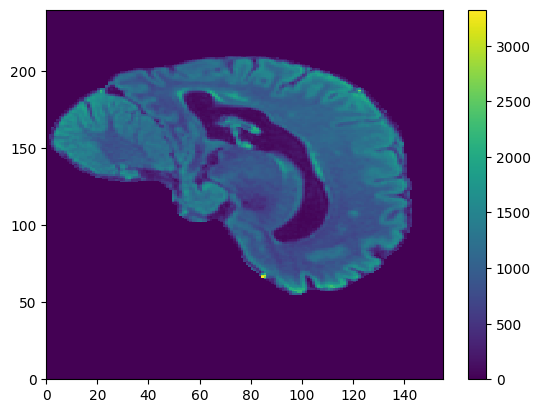

In [45]:
plt.pcolormesh(img[100])
plt.colorbar()
img.shape

In [47]:
def histogram_equalization_3d(volume, background_value=0):
    equalized_volume = np.zeros_like(volume, dtype=np.uint8)

    for i in range(volume.shape[2]):  # Loop over each slice along the z-axis
        # Get the current slice
        slc = volume[:, :, i]

        # Create a mask for non-background pixels
        mask = slc != background_value

        # Apply histogram equalization only to the non-background pixels
        equalized_slice = np.zeros_like(slc, dtype=np.float32)
        if np.any(mask):  # Check if there are any non-background pixels
            equalized_slice[mask] = exposure.equalize_hist(slc[mask]) * 255

        # Store the equalized slice in the output volume
        equalized_volume[:, :, i] = equalized_slice.astype(np.uint8)

    return equalized_volume

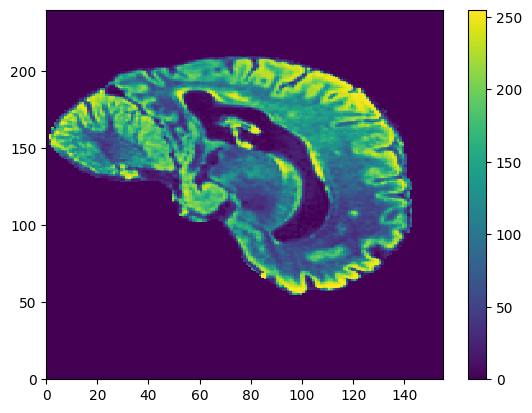

In [49]:
img2 = histogram_equalization_3d(img)
plt.pcolormesh(img2[100])
plt.colorbar()

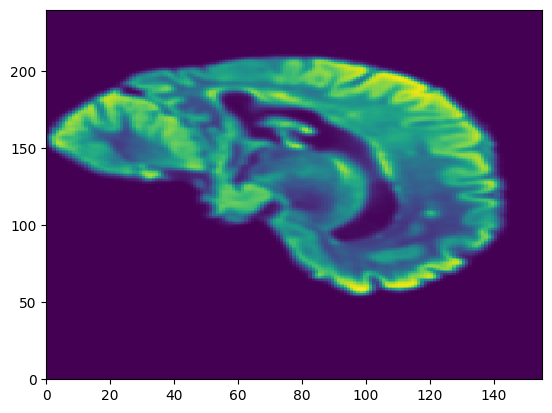

In [ ]:
gauss = flt.gaussian(img2)
plt.pcolormesh(gauss[100])

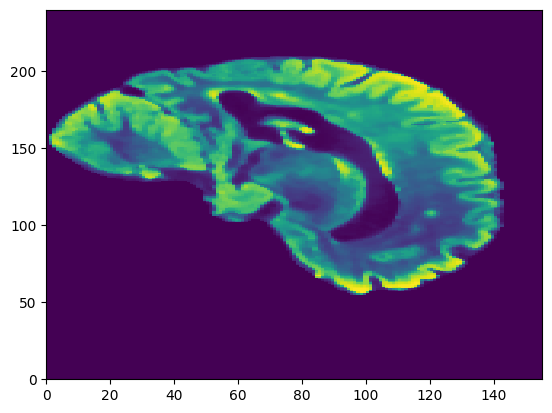

In [ ]:
med = flt.median(img2)
plt.pcolormesh(med[100])

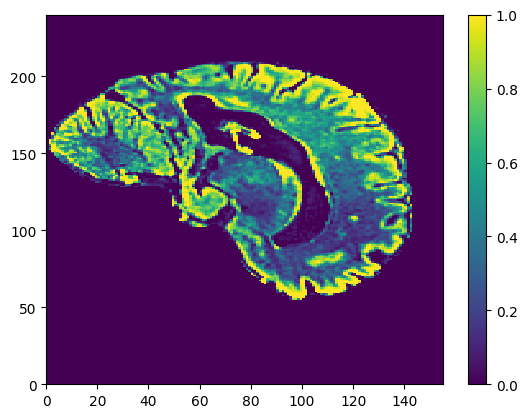

In [ ]:
unsharp = flt.unsharp_mask(img2)
plt.pcolormesh(unsharp[100])
plt.colorbar()

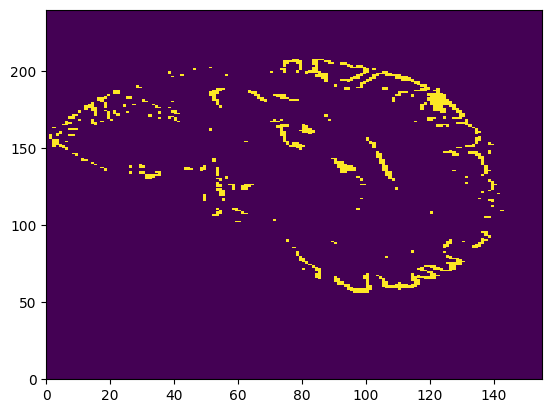

In [ ]:
bord = sgt.clear_border(unsharp)
plt.pcolormesh(bord[100])

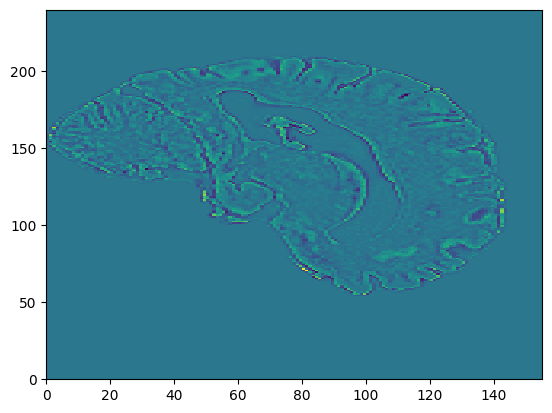

In [51]:
lap = flt.laplace(unsharp)
plt.pcolormesh(lap[100])

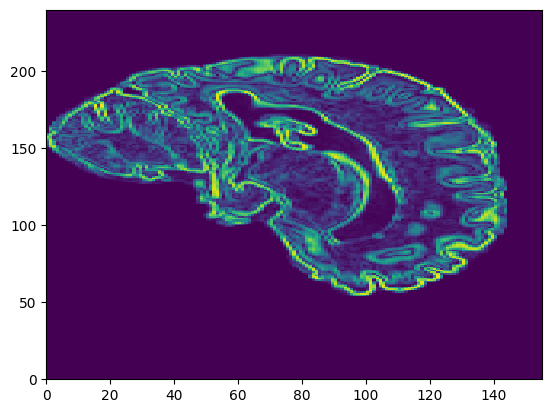

In [70]:
sobel = flt.sobel(unsharp)
plt.pcolormesh(sobel[100])

In [71]:
def otsu_threshold(volume):
    thresholds = []
    for i in range(volume.shape[2]):  # Loop over each slice along the Y-axis
        slc = volume[:, :, i]
        otsu_threshold = flt.threshold_otsu(slc)
        thresholds.append(otsu_threshold)
    return np.array(thresholds)

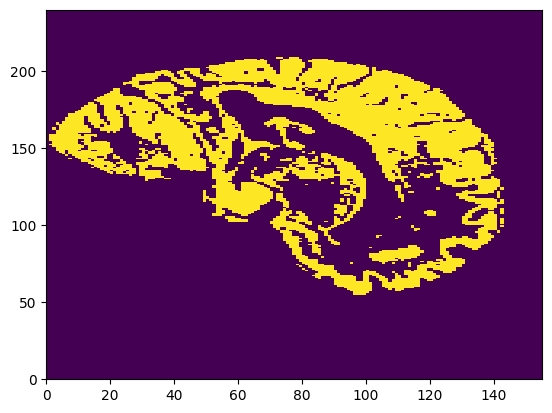

In [56]:
otsu = otsu_threshold(unsharp)
segmented_volume = np.zeros_like(unsharp, dtype=bool)
for i in range(unsharp.shape[2]):  # Apply thresholds to each slice
    segmented_volume[:, :, i] = unsharp[:, :, i] > otsu[i]

plt.pcolormesh(segmented_volume[100])

(240, 240, 155)

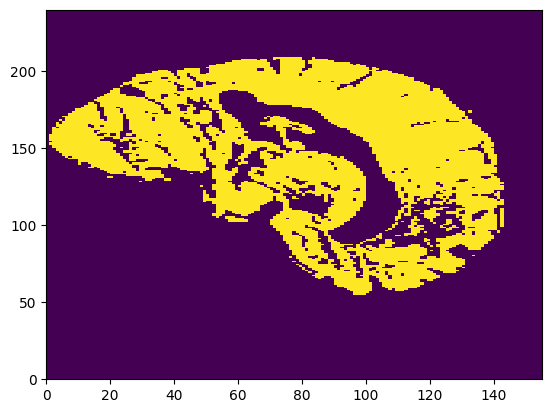

In [62]:
mask = unsharp > 0.2
plt.pcolormesh(mask[100])
mask.shape

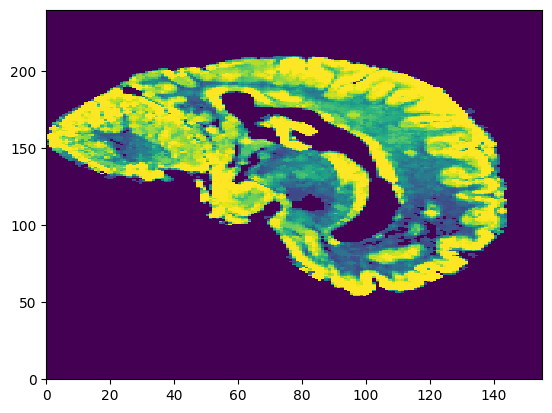

In [68]:
#MORPHOLOGICAL OPERATIONS
dilated = morph.dilation(masked)
plt.pcolormesh(dilated[100])

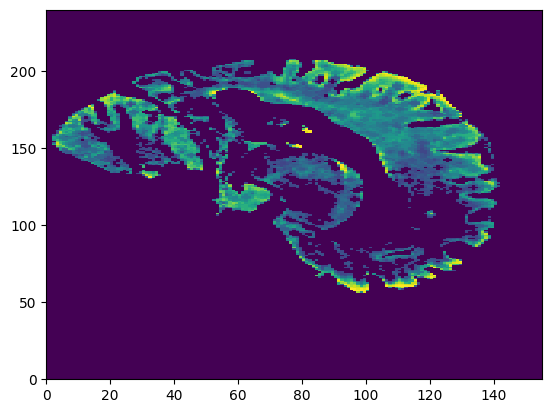

In [67]:
eroded = morph.erosion(masked)
plt.pcolormesh(eroded[100])

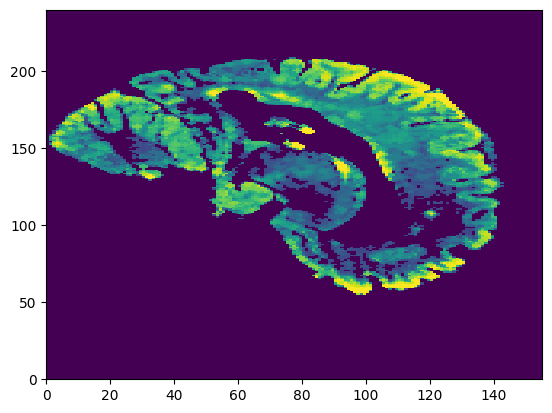

In [66]:
#Opening
open = morph.dilation(eroded)
plt.pcolormesh(open[100])

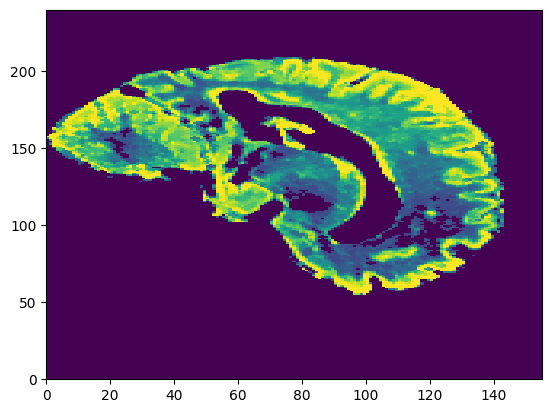

In [64]:
#Closing
close = morph.erosion(dilated)
plt.pcolormesh(close[100])

In [69]:
affine = np.eye(4)
nifti_img = nib.Nifti1Image(unsharp, affine)
nib.save(nifti_img, '/content/drive/My Drive/output_image.nii')
